## Decision Tree

             precision    recall  f1-score   support

      False       0.94      0.94      0.94       711
       True       0.67      0.66      0.66       122

avg / total       0.90      0.90      0.90       833



/Users/fabienngo/anaconda/lib/python3.4/site-packages/sklearn/metrics/metrics.py:1771: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


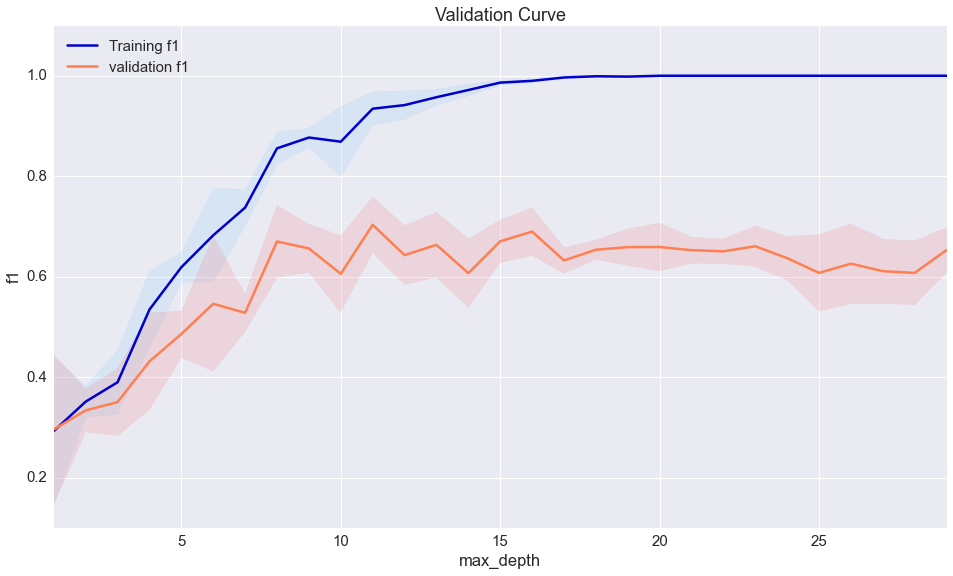

In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from evaluation import deviance_curve, plot_tree
from IPython.display import Image
%matplotlib inline
df = pd.read_csv('data/churn_cleaned.csv')
features = df.drop('churn', axis=1)
labels = df['churn']
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=2500)

clf = DecisionTreeClassifier(max_features='sqrt', max_depth=15)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

param_range = np.arange(1, 30, 1)
deviance_curve(clf, X_train, y_train, 
               'max_depth', 
               param_range=param_range, 
               metric='f1', 
               n_folds=5, njobs=-1)



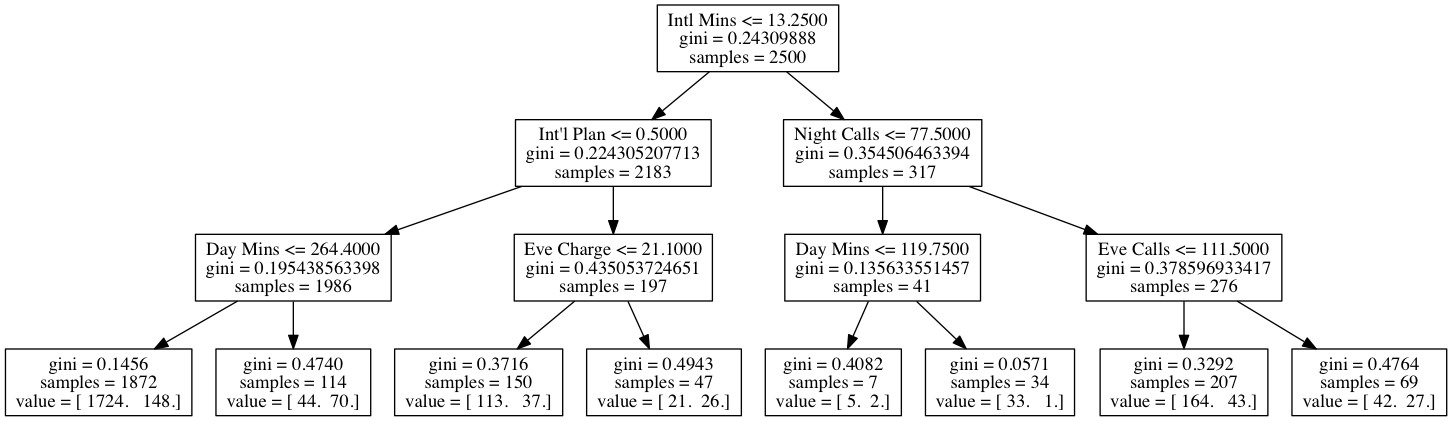

In [2]:
# plot_tree(clf, 'tree.dot', features_name = features.columns)
Image(filename=('tree.png'))

In [9]:
features.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [25]:
p = labels[df['churn']==1].size/labels.size
print(p)
print(p*(1-p))
print(p*(1-p)*2)

0.14491449144914492
0.12391428161718063
0.24782856323436125


In [24]:
y_train[y_train == True].size/y_train.size*y_train[y_train == False].size/y_train.size*2

0.24309888000000002